In [1]:
import matplotlib.pyplot as plt
import libertem.api as lt
import numpy as np
from libertem.analysis.getroi import get_roi
import numpy as np
from libertem.analysis import SDAnalysis

In [2]:
%matplotlib nbagg

# Connection
**more about local conn**

In [3]:
ctx = lt.Context()

In [4]:
params = {'path': '/home/abi/Documents/LiberTEM_data/calibrationData_circularProbe.h5', 'ds_path': '4DSTEM_experiment/data/datacubes/polyAu_4DSTEM/data'}
ds = ctx.load("HDF5", **params)

# SUM Analysis
***about sum analysis ***

In [5]:
sum_analysis = ctx.create_sum_analysis(dataset=ds)
roi_params = {'shape': 'disk', 'cx': 42, 'cy': 50, 'r': 10.5}
roi = get_roi(roi_params, ds.shape.nav)
udf = sum_analysis.get_udf()
sum_result = ctx.run_udf(ds, udf, roi, progress=True)

100%|██████████| 5/5 [00:07<00:00,  1.43s/it]


<IPython.core.display.Javascript object>


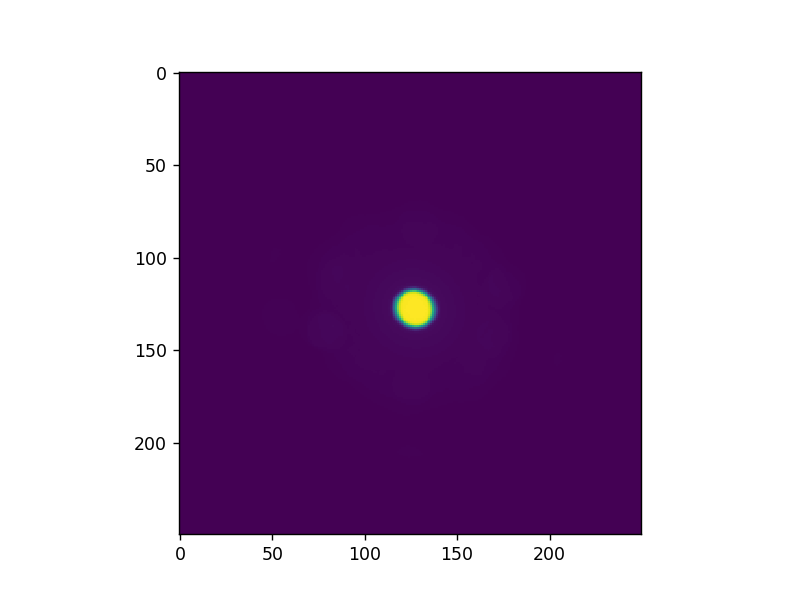

In [6]:
plt.figure()
plt.imshow(sum_result['intensity'].raw_data)

# SD Analysis
***about sd analysis ***

In [7]:
sd_analysis = SDAnalysis(dataset=ds, parameters={'roi': {}})
sd_result = ctx.run(sd_analysis, progress=True)

 20%|██        | 1/5 [00:05<00:23,  5.77s/it]/home/abi/libertem-venv/lib/python3.7/site-packages/sparse/_coo/numba_extension.py:18: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  from numba.targets.imputils import impl_ret_borrowed, lower_constant
/home/abi/libertem-venv/lib/python3.7/site-packages/sparse/_coo/numba_extension.py:18: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.targets.imputils', please update to use 'numba.core.imputils' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.targets.imputils import impl_ret_borrowed, lower_constant
/home/abi/libertem-venv/lib/python3.7/site-packages/sparse/_coo/numba_extension.py:18: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'impl_ret_borrowed' requested from: 'numba.

<IPython.core.display.Javascript object>


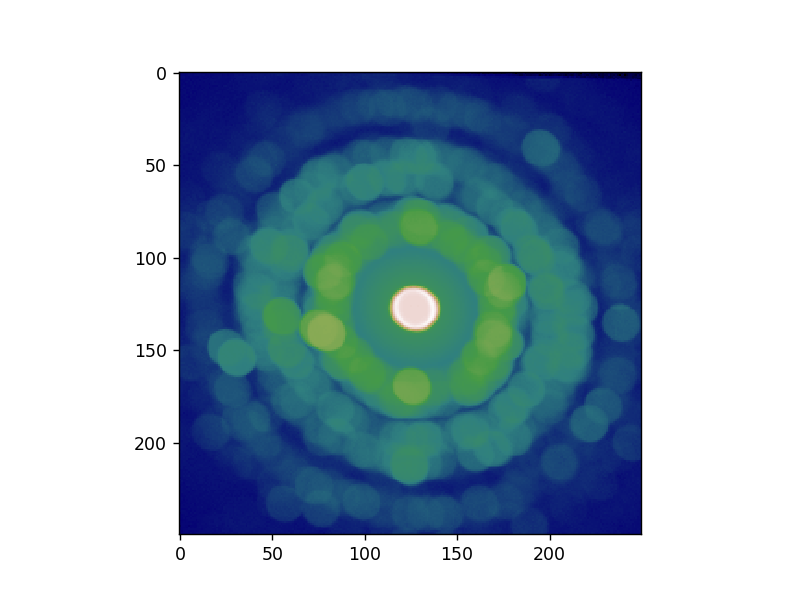

In [8]:
plt.figure()
plt.imshow(sd_result.intensity.visualized)